<a href="https://colab.research.google.com/github/phil-debug/Python-Trading-Project/blob/main/Algorithmic_Trading_Python_2023_Tutorial_Workbook_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algorithmic Trading Python 2023

This notebook follows and then builds upon the QuantProgram tutorial linked below to build the foundations of algorithmic trading in Python.

**Modules used**: yfinance, pandas, matplotlit, and seaborn

[Link to tutorial](https://youtube.com/watch?v=GDMkkmkJigw)

Downloading stock data
Working with data
Read and writing Data
Separating and Segregating Data
Data visualization and graphs
Normalization
Making changes and creating new data
Deleting Data
Resampling Data
Histogram Graph
Mean, Variance and Standard Deviation
Scatter Plot
Stock Comparison with risk metric
For loops
Correlation and Covariance
Heat map
Challenge 1
Simple and Log returns
Creating Moving averages data
Challenge 2
Reindexing
Forward fill and Backfill
Cumulative returns and drawdowns
Creating and Backtesting Strategies
Comparison to buy and hold
Long bias Strategy
Challenge 3
Creating a function
Creating a class
Importing and Using a Class
Challenge 4
API




In [196]:
import yfinance as yf
import pandas as pd
import datetime as dt
from pandas.tseries.offsets import MonthEnd

In [197]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/S%26P_100')[2]

In [198]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

In [199]:
#download an individual ticker 
Apple = yf.download("AAPL", start = "2010-01-01", end = "2022-01-01")

[*********************100%***********************]  1 of 1 completed


In [200]:
#check data
Apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496295,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507526,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404016,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392175,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434674,447610800


In [201]:
#tickers in an array
tickers = ["BLK","AAPL","BA"]

In [202]:
#download stock data in an array from yahoo finance 
Stocks = yf.download(tickers, start = "2010-01-01", end = "2022-01-01")

[*********************100%***********************]  3 of 3 completed


In [203]:
Stocks.head()

Adj Close                            Close                         \
                AAPL         BA         BLK      AAPL         BA         BLK   
Date                                                                           
2010-01-04  6.496293  43.777550  168.983841  7.643214  56.180000  238.580002   
2010-01-05  6.507524  45.211342  169.713394  7.656429  58.020000  239.610001   
2010-01-06  6.404016  46.582790  166.214401  7.534643  59.779999  234.669998   
2010-01-07  6.392176  48.468552  168.041809  7.520714  62.200001  237.250000   
2010-01-08  6.434673  48.001019  169.224640  7.570714  61.599998  238.919998   

                High                              Low                         \
                AAPL         BA         BLK      AAPL         BA         BLK   
Date                                                                           
2010-01-04  7.660714  56.389999  239.600006  7.585000  54.799999  233.520004   
2010-01-05  7.699643  58.279999  239.669998  7.616071  56.000000  236.759995   
2010-01-06  7.686786  59.990002  238.649994  7.526786  57.880001  234.059998   
2010-01-07  7.571429  62.310001  237.699997  7.466071  59.020000  234.000000   
2010-01-08  7.571429  61.779999  239.410004  7.466429  60.860001  236.750000   

                Open                            Volume                    
                AAPL         BA         BLK       AAPL        BA     BLK  
Date                                                                      
2010-01-04  7.622500  55.720001  236.050003  493729600   6186700  238700  
2010-01-05  7.664286  56.250000  239.050003  601904800   8867800  198800  
2010-01-06  7.656429  58.230000  238.509995  552160000   8836500  278500  
2010-01-07  7.562500  59.509998  234.660004  477131200  14379100  218300  
2010-01-08  7.510714  61.540001  237.460007  447610800   7146600  224400

In [204]:
#Check datatype
Stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3021 entries, 2010-01-04 to 2021-12-31
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  3021 non-null   float64
 1   (Adj Close, BA)    3021 non-null   float64
 2   (Adj Close, BLK)   3021 non-null   float64
 3   (Close, AAPL)      3021 non-null   float64
 4   (Close, BA)        3021 non-null   float64
 5   (Close, BLK)       3021 non-null   float64
 6   (High, AAPL)       3021 non-null   float64
 7   (High, BA)         3021 non-null   float64
 8   (High, BLK)        3021 non-null   float64
 9   (Low, AAPL)        3021 non-null   float64
 10  (Low, BA)          3021 non-null   float64
 11  (Low, BLK)         3021 non-null   float64
 12  (Open, AAPL)       3021 non-null   float64
 13  (Open, BA)         3021 non-null   float64
 14  (Open, BLK)        3021 non-null   float64
 15  (Volume, AAPL)     3021 non-null   int64  
 16  (Volum

In [205]:
#convert it to a CSV file 
Stocks.to_csv("stocks_practice.csv")

In [206]:
#read and write from the csv fike 
Stocks = pd.read_csv("stocks_practice.csv", header =[0,1])

In [207]:
Stocks

Unnamed: 0_level_0   Adj Close                               Close  \
     Unnamed: 0_level_1        AAPL          BA         BLK        AAPL   
0                  Date         NaN         NaN         NaN         NaN   
1            2010-01-04    6.496293   43.777550  168.983841    7.643214   
2            2010-01-05    6.507524   45.211342  169.713394    7.656429   
3            2010-01-06    6.404016   46.582790  166.214401    7.534643   
4            2010-01-07    6.392176   48.468552  168.041809    7.520714   
...                 ...         ...         ...         ...         ...   
3017         2021-12-27  178.768860  203.169998  890.569336  180.330002   
3018         2021-12-28  177.737839  206.130005  889.845398  179.289993   
3019         2021-12-29  177.827087  203.660004  878.165039  179.380005   
3020         2021-12-30  176.657303  202.710007  882.064880  178.199997   
3021         2021-12-31  176.032745  201.320007  883.802490  177.570007   

                                    High                                 Low  \
              BA         BLK        AAPL          BA         BLK        AAPL   
0            NaN         NaN         NaN         NaN         NaN         NaN   
1      56.180000  238.580002    7.660714   56.389999  239.600006    7.585000   
2      58.020000  239.610001    7.699643   58.279999  239.669998    7.616071   
3      59.779999  234.669998    7.686786   59.990002  238.649994    7.526786   
4      62.200001  237.250000    7.571429   62.310001  237.699997    7.466071   
...          ...         ...         ...         ...         ...         ...   
3017  203.169998  922.570007  180.419998  203.429993  923.130005  177.070007   
3018  206.130005  921.820007  181.330002  208.940002  929.059998  178.529999   
3019  203.660004  909.719971  180.630005  205.410004  922.960022  178.139999   
3020  202.710007  913.760010  180.570007  206.000000  918.059998  178.089996   
3021  201.320007  915.559998  179.229996  203.690002  919.820007  177.259995   

                                    Open                               Volume  \
              BA         BLK        AAPL          BA         BLK         AAPL   
0            NaN         NaN         NaN         NaN         NaN          NaN   
1      54.799999  233.520004    7.622500   55.720001  236.050003  493729600.0   
2      56.000000  236.759995    7.664286   56.250000  239.050003  601904800.0   
3      57.880001  234.059998    7.656429   58.230000  238.509995  552160000.0   
4      59.020000  234.000000    7.562500   59.509998  234.660004  477131200.0   
...          ...         ...         ...         ...         ...          ...   
3017  199.100006  912.000000  177.089996  201.990005  918.799988   74919600.0   
3018  201.649994  921.130005  180.160004  202.229996  923.780029   79144300.0   
3019  202.600006  907.679993  179.330002  205.360001  921.270020   62348900.0   
3020  202.600006  906.469971  179.470001  203.000000  911.719971   59773000.0   
3021  200.029999  913.500000  178.089996  202.199997  915.340027   64062300.0   

                            
              BA       BLK  
0            NaN       NaN  
1      6186700.0  238700.0  
2      8867800.0  198800.0  
3      8836500.0  278500.0  
4     14379100.0  218300.0  
...          ...       ...  
3017   7818900.0  410900.0  
3018   8879700.0  385200.0  
3019   6119000.0  392000.0  
3020   7012600.0  315900.0  
3021   8053000.0  215100.0  

[3022 rows x 19 columns]

In [208]:
Stocks = pd.read_csv("stocks_practice.csv", header =[0,1], index_col=[0], parse_dates=[0])
Stocks

Adj Close                               Close              \
                  AAPL          BA         BLK        AAPL          BA   
Date                                                                     
2010-01-04    6.496293   43.777550  168.983841    7.643214   56.180000   
2010-01-05    6.507524   45.211342  169.713394    7.656429   58.020000   
2010-01-06    6.404016   46.582790  166.214401    7.534643   59.779999   
2010-01-07    6.392176   48.468552  168.041809    7.520714   62.200001   
2010-01-08    6.434673   48.001019  169.224640    7.570714   61.599998   
...                ...         ...         ...         ...         ...   
2021-12-27  178.768860  203.169998  890.569336  180.330002  203.169998   
2021-12-28  177.737839  206.130005  889.845398  179.289993  206.130005   
2021-12-29  177.827087  203.660004  878.165039  179.380005  203.660004   
2021-12-30  176.657303  202.710007  882.064880  178.199997  202.710007   
2021-12-31  176.032745  201.320007  883.802490  177.570007  201.320007   

                              High                                 Low  \
                   BLK        AAPL          BA         BLK        AAPL   
Date                                                                     
2010-01-04  238.580002    7.660714   56.389999  239.600006    7.585000   
2010-01-05  239.610001    7.699643   58.279999  239.669998    7.616071   
2010-01-06  234.669998    7.686786   59.990002  238.649994    7.526786   
2010-01-07  237.250000    7.571429   62.310001  237.699997    7.466071   
2010-01-08  238.919998    7.571429   61.779999  239.410004    7.466429   
...                ...         ...         ...         ...         ...   
2021-12-27  922.570007  180.419998  203.429993  923.130005  177.070007   
2021-12-28  921.820007  181.330002  208.940002  929.059998  178.529999   
2021-12-29  909.719971  180.630005  205.410004  922.960022  178.139999   
2021-12-30  913.760010  180.570007  206.000000  918.059998  178.089996   
2021-12-31  915.559998  179.229996  203.690002  919.820007  177.259995   

                                          Open                          \
                    BA         BLK        AAPL          BA         BLK   
Date                                                                     
2010-01-04   54.799999  233.520004    7.622500   55.720001  236.050003   
2010-01-05   56.000000  236.759995    7.664286   56.250000  239.050003   
2010-01-06   57.880001  234.059998    7.656429   58.230000  238.509995   
2010-01-07   59.020000  234.000000    7.562500   59.509998  234.660004   
2010-01-08   60.860001  236.750000    7.510714   61.540001  237.460007   
...                ...         ...         ...         ...         ...   
2021-12-27  199.100006  912.000000  177.089996  201.990005  918.799988   
2021-12-28  201.649994  921.130005  180.160004  202.229996  923.780029   
2021-12-29  202.600006  907.679993  179.330002  205.360001  921.270020   
2021-12-30  202.600006  906.469971  179.470001  203.000000  911.719971   
2021-12-31  200.029999  913.500000  178.089996  202.199997  915.340027   

               Volume                    
                 AAPL        BA     BLK  
Date                                     
2010-01-04  493729600   6186700  238700  
2010-01-05  601904800   8867800  198800  
2010-01-06  552160000   8836500  278500  
2010-01-07  477131200  14379100  218300  
2010-01-08  447610800   7146600  224400  
...               ...       ...     ...  
2021-12-27   74919600   7818900  410900  
2021-12-28   79144300   8879700  385200  
2021-12-29   62348900   6119000  392000  
2021-12-30   59773000   7012600  315900  
2021-12-31   64062300   8053000  215100  

[3021 rows x 18 columns]

In [209]:
Stocks.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',   'BA'),
            ('Adj Close',  'BLK'),
            (    'Close', 'AAPL'),
            (    'Close',   'BA'),
            (    'Close',  'BLK'),
            (     'High', 'AAPL'),
            (     'High',   'BA'),
            (     'High',  'BLK'),
            (      'Low', 'AAPL'),
            (      'Low',   'BA'),
            (      'Low',  'BLK'),
            (     'Open', 'AAPL'),
            (     'Open',   'BA'),
            (     'Open',  'BLK'),
            (   'Volume', 'AAPL'),
            (   'Volume',   'BA'),
            (   'Volume',  'BLK')],
           )

In [210]:
#convert multi index to one tuple 
Stocks.columns = Stocks.columns.to_flat_index()
Stocks.columns

Index([('Adj Close', 'AAPL'),   ('Adj Close', 'BA'),  ('Adj Close', 'BLK'),
           ('Close', 'AAPL'),       ('Close', 'BA'),      ('Close', 'BLK'),
            ('High', 'AAPL'),        ('High', 'BA'),       ('High', 'BLK'),
             ('Low', 'AAPL'),         ('Low', 'BA'),        ('Low', 'BLK'),
            ('Open', 'AAPL'),        ('Open', 'BA'),       ('Open', 'BLK'),
          ('Volume', 'AAPL'),      ('Volume', 'BA'),     ('Volume', 'BLK')],
      dtype='object')

In [211]:
Stocks

,"(Adj Close, AAPL)","(Adj Close, BA)","(Adj Close, BLK)","(Close, AAPL)","(Close, BA)","(Close, BLK)","(High, AAPL)","(High, BA)","(High, BLK)","(Low, AAPL)","(Low, BA)","(Low, BLK)","(Open, AAPL)","(Open, BA)","(Open, BLK)","(Volume, AAPL)","(Volume, BA)","(Volume, BLK)"
Date,,,,,,,,,,,,,,,,,,
2010-01-04,6.496293,43.777550,168.983841,7.643214,56.180000,238.580002,7.660714,56.389999,239.600006,7.585000,54.799999,233.520004,7.622500,55.720001,236.050003,493729600,6186700,238700
2010-01-05,6.507524,45.211342,169.713394,7.656429,58.020000,239.610001,7.699643,58.279999,239.669998,7.616071,56.000000,236.759995,7.664286,56.250000,239.050003,601904800,8867800,198800
2010-01-06,6.404016,46.582790,166.214401,7.534643,59.779999,234.669998,7.686786,59.990002,238.649994,7.526786,57.880001,234.059998,7.656429,58.230000,238.509995,552160000,8836500,278500
2010-01-07,6.392176,48.468552,168.041809,7.520714,62.200001,237.250000,7.571429,62.310001,237.699997,7.466071,59.020000,234.000000,7.562500,59.509998,234.660004,477131200,14379100,218300
2010-01-08,6.434673,48.001019,169.224640,7.570714,61.599998,238.919998,7.571429,61.779999,239.410004,7.466429,60.860001,236.750000,7.510714,61.540001,237.460007,447610800,7146600,224400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,178.768860,203.169998,890.569336,180.330002,203.169998,922.570007,180.419998,203.429993,923.130005,177.070007,199.100006,912.000000,177.089996,201.990005,918.799988,74919600,7818900,410900
2021-12-28,177.737839,206.130005,889.845398,179.289993,206.130005,921.820007,181.330002,208.940002,929.059998,178.529999,201.649994,921.130005,180.160004,202.229996,923.780029,79144300,8879700,385200
2021-12-29,177.827087,203.660004,878.165039,179.380005,203.660004,909.719971,180.630005,205.410004,922.960022,178.139999,202.600006,907.679993,179.330002,205.360001,921.270020,62348900,6119000,392000


In [212]:
#convert back to multi index
Stocks.columns = pd.MultiIndex.from_tuples(Stocks.columns)
Stocks.columns 

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',   'BA'),
            ('Adj Close',  'BLK'),
            (    'Close', 'AAPL'),
            (    'Close',   'BA'),
            (    'Close',  'BLK'),
            (     'High', 'AAPL'),
            (     'High',   'BA'),
            (     'High',  'BLK'),
            (      'Low', 'AAPL'),
            (      'Low',   'BA'),
            (      'Low',  'BLK'),
            (     'Open', 'AAPL'),
            (     'Open',   'BA'),
            (     'Open',  'BLK'),
            (   'Volume', 'AAPL'),
            (   'Volume',   'BA'),
            (   'Volume',  'BLK')],
           )

In [213]:
Stocks.describe()

Adj Close                                  Close               \
              AAPL           BA          BLK         AAPL           BA   
count  3021.000000  3021.000000  3021.000000  3021.000000  3021.000000   
mean     40.634749   160.980174   332.494242    42.720728   171.980371   
std      38.265299   102.526356   191.970725    38.084410   100.144083   
min       5.829698    43.777550    99.829033     6.858929    56.180000   
25%      16.089111    63.368431   169.011810    18.537500    76.550003   
50%      25.875898   123.419212   294.336334    28.262501   136.669998   
75%      46.249245   226.300980   421.677795    48.185001   229.500000   
max     178.768860   430.299957   933.487000   180.330002   440.619995   

                           High                                    Low  \
               BLK         AAPL           BA          BLK         AAPL   
count  3021.000000  3021.000000  3021.000000  3021.000000  3021.000000   
mean    383.600579    43.142652   173.952380   387.226312    42.260698   
std     188.387340    38.498218   101.326909   189.964411    37.621622   
min     139.440002     7.000000    56.389999   141.639999     6.794643   
25%     234.479996    18.651787    76.980003   236.320007    18.345358   
50%     356.010010    28.552500   138.250000   358.450012    27.992500   
75%     473.989990    48.615002   233.940002   477.510010    47.787498   
max     971.489990   182.130005   446.010010   973.159973   178.529999   

                                        Open                            \
                BA          BLK         AAPL           BA          BLK   
count  3021.000000  3021.000000  3021.000000  3021.000000  3021.000000   
mean    170.027355   379.809706    42.698028   172.042013   383.657537   
std      98.932857   186.808072    38.047906   100.159725   188.432083   
min      54.799999   137.000000     6.870357    55.720001   140.020004   
25%      75.750000   231.660004    18.523571    76.349998   234.119995   
50%     135.490005   352.619995    28.264999   137.000000   355.940002   
75%     225.899994   470.390015    48.105000   229.389999   474.000000   
max     440.190002   962.309998   181.119995   446.010010   971.520020   

             Volume                              
               AAPL            BA           BLK  
count  3.021000e+03  3.021000e+03  3.021000e+03  
mean   2.702590e+08  7.291368e+06  6.968488e+05  
std    2.259517e+08  9.184732e+06  7.499599e+05  
min    4.100000e+07  7.889000e+05  1.235000e+05  
25%    1.096348e+08  3.303500e+06  4.530000e+05  
50%    1.842204e+08  4.517200e+06  5.894000e+05  
75%    3.707320e+08  6.945300e+06  7.828000e+05  
max    1.880998e+09  1.032128e+08  2.288800e+07

In [214]:
close=Stocks.loc[: ,"Close"].copy()
close

,AAPL,BA,BLK
Date,,,
2010-01-04,7.643214,56.180000,238.580002
2010-01-05,7.656429,58.020000,239.610001
2010-01-06,7.534643,59.779999,234.669998
2010-01-07,7.520714,62.200001,237.250000
2010-01-08,7.570714,61.599998,238.919998
...,...,...,...
2021-12-27,180.330002,203.169998,922.570007
2021-12-28,179.289993,206.130005,921.820007
2021-12-29,179.380005,203.660004,909.719971


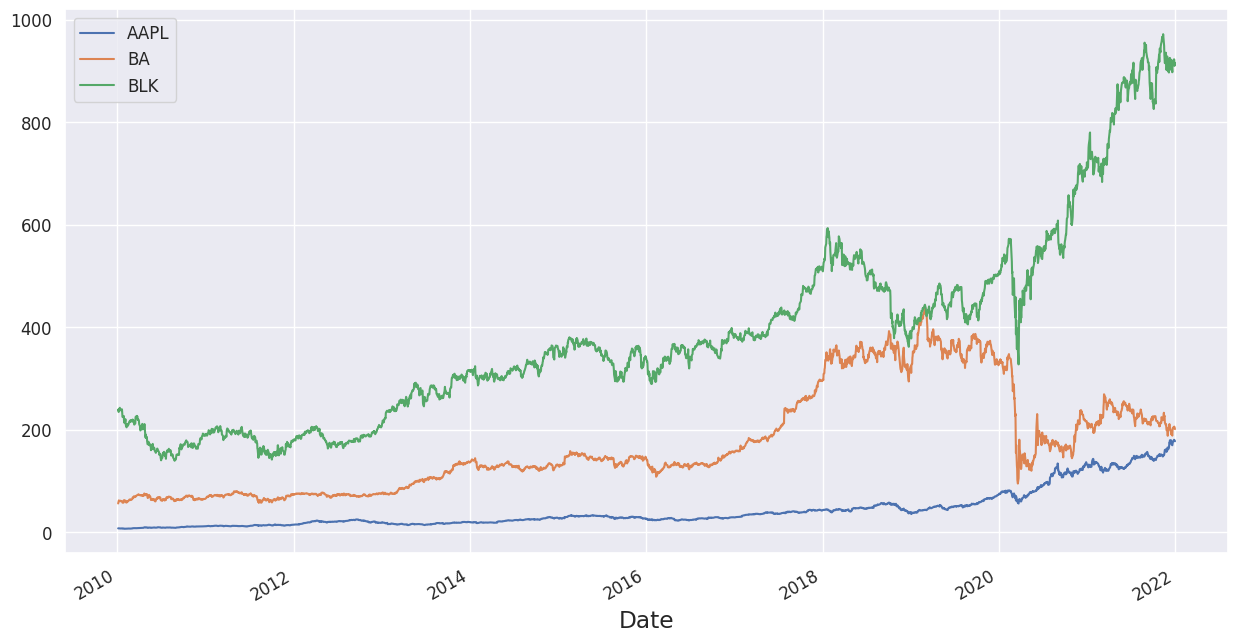

In [215]:
close.plot(figsize=(15,8), fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [216]:
close.iloc[0,0]

7.643214225769043

In [217]:
close.AAPL

Date
2010-01-04      7.643214
2010-01-05      7.656429
2010-01-06      7.534643
2010-01-07      7.520714
2010-01-08      7.570714
                 ...    
2021-12-27    180.330002
2021-12-28    179.289993
2021-12-29    179.380005
2021-12-30    178.199997
2021-12-31    177.570007
Name: AAPL, Length: 3021, dtype: float64

In [218]:
close.AAPL.div(close.iloc[0]).mul(100)


2010-01-04 00:00:00   NaN
2010-01-05 00:00:00   NaN
2010-01-06 00:00:00   NaN
2010-01-07 00:00:00   NaN
2010-01-08 00:00:00   NaN
                       ..
2021-12-30 00:00:00   NaN
2021-12-31 00:00:00   NaN
AAPL                  NaN
BA                    NaN
BLK                   NaN
Length: 3024, dtype: float64

In [219]:
close.div(close.iloc[0]).mul(100)


,AAPL,BA,BLK
Date,,,
2010-01-04,100.000000,100.000000,100.000000
2010-01-05,100.172893,103.275187,100.431721
2010-01-06,98.579511,106.407972,98.361135
2010-01-07,98.397266,110.715558,99.442534
2010-01-08,99.051443,109.647558,100.142508
...,...,...,...
2021-12-27,2359.347736,361.641148,386.692095
2021-12-28,2345.740784,366.909939,386.377735
2021-12-29,2346.918451,362.513354,381.306046


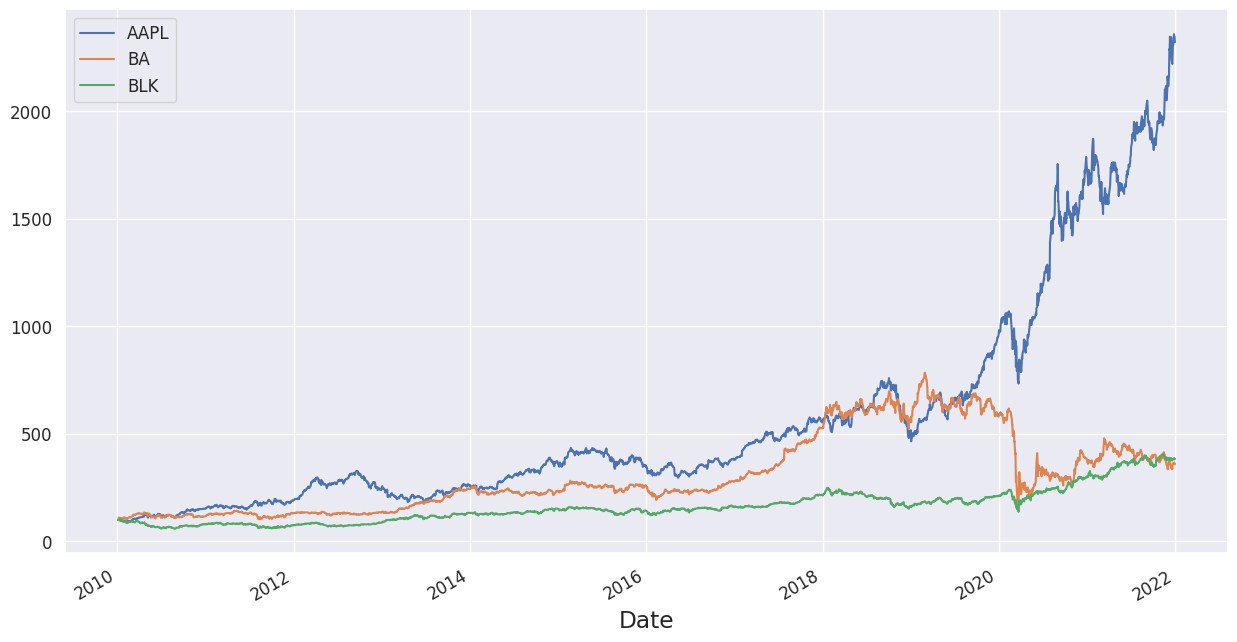

In [220]:
#normalised graph values 
norm_close=close.div(close.iloc[0]).mul(100)
norm_close.plot(figsize=(15,8), fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [221]:
aapl = close.AAPL.copy().to_frame()
aapl

,AAPL
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
...,...
2021-12-27,180.330002
2021-12-28,179.289993
2021-12-29,179.380005


In [222]:
aapl["lag1"] = aapl.shift(periods = 1)

In [223]:
aapl

,AAPL,lag1
Date,,
2010-01-04,7.643214,NaN
2010-01-05,7.656429,7.643214
2010-01-06,7.534643,7.656429
2010-01-07,7.520714,7.534643
2010-01-08,7.570714,7.520714
...,...,...
2021-12-27,180.330002,176.279999
2021-12-28,179.289993,180.330002
2021-12-29,179.380005,179.289993


In [224]:
aapl["difference"] = aapl.AAPL.sub(aapl.lag1)

In [225]:
aapl

,AAPL,lag1,difference
Date,,,
2010-01-04,7.643214,NaN,NaN
2010-01-05,7.656429,7.643214,0.013215
2010-01-06,7.534643,7.656429,-0.121786
2010-01-07,7.520714,7.534643,-0.013929
2010-01-08,7.570714,7.520714,0.050000
...,...,...,...
2021-12-27,180.330002,176.279999,4.050003
2021-12-28,179.289993,180.330002,-1.040009
2021-12-29,179.380005,179.289993,0.090012


In [226]:
aapl["Percentage_Change"] = aapl.AAPL.div(aapl.lag1).sub(1).mul(100)

In [227]:
aapl

,AAPL,lag1,difference,Percentage_Change
Date,,,,
2010-01-04,7.643214,NaN,NaN,NaN
2010-01-05,7.656429,7.643214,0.013215,0.172893
2010-01-06,7.534643,7.656429,-0.121786,-1.590632
2010-01-07,7.520714,7.534643,-0.013929,-0.184871
2010-01-08,7.570714,7.520714,0.050000,0.664833
...,...,...,...,...
2021-12-27,180.330002,176.279999,4.050003,2.297483
2021-12-28,179.289993,180.330002,-1.040009,-0.576725
2021-12-29,179.380005,179.289993,0.090012,0.050204


In [228]:
aapl

,AAPL,lag1,difference,Percentage_Change
Date,,,,
2010-01-04,7.643214,NaN,NaN,NaN
2010-01-05,7.656429,7.643214,0.013215,0.172893
2010-01-06,7.534643,7.656429,-0.121786,-1.590632
2010-01-07,7.520714,7.534643,-0.013929,-0.184871
2010-01-08,7.570714,7.520714,0.050000,0.664833
...,...,...,...,...
2021-12-27,180.330002,176.279999,4.050003,2.297483
2021-12-28,179.289993,180.330002,-1.040009,-0.576725
2021-12-29,179.380005,179.289993,0.090012,0.050204


In [229]:
aapl["Difference2"] = aapl.AAPL.diff(periods = 1)

In [230]:
aapl

,AAPL,lag1,difference,Percentage_Change,Difference2
Date,,,,,
2010-01-04,7.643214,NaN,NaN,NaN,NaN
2010-01-05,7.656429,7.643214,0.013215,0.172893,0.013215
2010-01-06,7.534643,7.656429,-0.121786,-1.590632,-0.121786
2010-01-07,7.520714,7.534643,-0.013929,-0.184871,-0.013929
2010-01-08,7.570714,7.520714,0.050000,0.664833,0.050000
...,...,...,...,...,...
2021-12-27,180.330002,176.279999,4.050003,2.297483,4.050003
2021-12-28,179.289993,180.330002,-1.040009,-0.576725,-1.040009
2021-12-29,179.380005,179.289993,0.090012,0.050204,0.090012


In [231]:
aapl["Percentage_Change2"] = aapl.AAPL.pct_change(periods=1).mul(100)

In [232]:
aapl

,AAPL,lag1,difference,Percentage_Change,Difference2,Percentage_Change2
Date,,,,,,
2010-01-04,7.643214,NaN,NaN,NaN,NaN,NaN
2010-01-05,7.656429,7.643214,0.013215,0.172893,0.013215,0.172893
2010-01-06,7.534643,7.656429,-0.121786,-1.590632,-0.121786,-1.590632
2010-01-07,7.520714,7.534643,-0.013929,-0.184871,-0.013929,-0.184871
2010-01-08,7.570714,7.520714,0.050000,0.664833,0.050000,0.664833
...,...,...,...,...,...,...
2021-12-27,180.330002,176.279999,4.050003,2.297483,4.050003,2.297483
2021-12-28,179.289993,180.330002,-1.040009,-0.576725,-1.040009,-0.576725
2021-12-29,179.380005,179.289993,0.090012,0.050204,0.090012,0.050204


In [233]:
del aapl['Percentage_Change']

In [234]:
aapl

,AAPL,lag1,difference,Difference2,Percentage_Change2
Date,,,,,
2010-01-04,7.643214,NaN,NaN,NaN,NaN
2010-01-05,7.656429,7.643214,0.013215,0.013215,0.172893
2010-01-06,7.534643,7.656429,-0.121786,-0.121786,-1.590632
2010-01-07,7.520714,7.534643,-0.013929,-0.013929,-0.184871
2010-01-08,7.570714,7.520714,0.050000,0.050000,0.664833
...,...,...,...,...,...
2021-12-27,180.330002,176.279999,4.050003,4.050003,2.297483
2021-12-28,179.289993,180.330002,-1.040009,-1.040009,-0.576725
2021-12-29,179.380005,179.289993,0.090012,0.090012,0.050204


In [235]:
aapl.rename(columns = {'Percentage_Change2' :'Daily change'},iplace )

SyntaxError: ignored

In [262]:

aapl.rename(columns = {'Percentage_Change2' :'Daily change'},inplace = 'true' )

In [263]:
aapl

,AAPL,lag1,difference,Difference2,Daily change
Date,,,,,
2010-01-04,7.643214,NaN,NaN,NaN,NaN
2010-01-05,7.656429,7.643214,0.013215,0.013215,0.172893
2010-01-06,7.534643,7.656429,-0.121786,-0.121786,-1.590632
2010-01-07,7.520714,7.534643,-0.013929,-0.013929,-0.184871
2010-01-08,7.570714,7.520714,0.050000,0.050000,0.664833
...,...,...,...,...,...
2021-12-27,180.330002,176.279999,4.050003,4.050003,2.297483
2021-12-28,179.289993,180.330002,-1.040009,-1.040009,-0.576725
2021-12-29,179.380005,179.289993,0.090012,0.090012,0.050204


In [264]:
#Last business day od the month 
aapl.AAPL.resample("M").last()

Date
2010-01-31      6.859286
2010-02-28      7.307857
2010-03-31      8.392857
2010-04-30      9.324643
2010-05-31      9.174286
                 ...    
2021-08-31    151.830002
2021-09-30    141.500000
2021-10-31    149.800003
2021-11-30    165.300003
2021-12-31    177.570007
Freq: M, Name: AAPL, Length: 144, dtype: float64

In [265]:
#Last day of the month 
aapl.AAPL.resample("BM").last()

Date
2010-01-29      6.859286
2010-02-26      7.307857
2010-03-31      8.392857
2010-04-30      9.324643
2010-05-31      9.174286
                 ...    
2021-08-31    151.830002
2021-09-30    141.500000
2021-10-29    149.800003
2021-11-30    165.300003
2021-12-31    177.570007
Freq: BM, Name: AAPL, Length: 144, dtype: float64

In [266]:
# % change on a monthly basis 
aapl.AAPL.resample("BM").last().pct_change(periods=1).mul(100)


Date
2010-01-29          NaN
2010-02-26     6.539620
2010-03-31    14.847028
2010-04-30    11.102138
2010-05-31    -1.612472
                ...    
2021-08-31     4.092967
2021-09-30    -6.803663
2021-10-29     5.865727
2021-11-30    10.347129
2021-12-31     7.422870
Freq: BM, Name: AAPL, Length: 144, dtype: float64

In [267]:
aapl

,AAPL,lag1,difference,Difference2,Daily change
Date,,,,,
2010-01-04,7.643214,NaN,NaN,NaN,NaN
2010-01-05,7.656429,7.643214,0.013215,0.013215,0.172893
2010-01-06,7.534643,7.656429,-0.121786,-0.121786,-1.590632
2010-01-07,7.520714,7.534643,-0.013929,-0.013929,-0.184871
2010-01-08,7.570714,7.520714,0.050000,0.050000,0.664833
...,...,...,...,...,...
2021-12-27,180.330002,176.279999,4.050003,4.050003,2.297483
2021-12-28,179.289993,180.330002,-1.040009,-1.040009,-0.576725
2021-12-29,179.380005,179.289993,0.090012,0.090012,0.050204


In [ ]:
del aapl['Daily change']

In [268]:
ret = aapl.pct_change().dropna()

In [269]:
ret

,AAPL,lag1,difference,Difference2,Daily change
Date,,,,,
2010-01-06,-0.015906,0.001729,-10.216000,-10.216000,-10.200093
2010-01-07,-0.001849,-0.015906,-0.885624,-0.885624,-0.883775
2010-01-08,0.006648,-0.001849,-4.589552,-4.589552,-4.596201
2010-01-11,-0.008821,0.006648,-2.335692,-2.335692,-2.326871
2010-01-12,-0.011375,-0.008821,0.278106,0.278106,0.289481
...,...,...,...,...,...
2021-12-27,0.022975,0.003644,5.328136,5.328136,5.305161
2021-12-28,-0.005767,0.022975,-1.256792,-1.256792,-1.251025
2021-12-29,0.000502,-0.005767,-1.086549,-1.086549,-1.087051


In [270]:
ret.plot(kind = "hist", figsize= (12,8), bins=100 )
plt.show()

ValueError: ignored

In [271]:
#mean returns 
daily_mean_return = ret.mean()

In [276]:
#daily varience
var_daily = ret.var()

In [273]:
import numpy as np

#daily standard deviation 
std_daily = np.sqrt(var_daily)

In [274]:
annual_mean_return = daily_mean_return * 252
annual_mean_return

AAPL            0.301990
lag1            0.302429
difference           NaN
Difference2          NaN
Daily change         NaN
dtype: float64

In [275]:
annual_var_return = var_daily * 252
annual_var_return

AAPL            0.078796
lag1            0.078794
difference           NaN
Difference2          NaN
Daily change         NaN
dtype: float64

In [260]:
annual_std_returns = np.sqrt(annual_var_return)

In [259]:
annual_std_returns

AAPL    0.28066
dtype: float64

In [258]:
ret.std()*np.sqrt(252)

AAPL    0.280660
BA      0.355306
BLK     0.276572
DIS     0.249430
IBM     0.224950
MSFT    0.250835
SPY     0.170051
dtype: float64

In [281]:
tickers = ["BLK","AAPL","BA","IBM","DIS","MSFT","SPY"]
Stocks = yf.download(tickers, start = "2010-01-01", end = "2022-01-01")
Stocks.head()

[*********************100%***********************]  7 of 7 completed


Adj Close                                                          \
                AAPL         BA         BLK        DIS        IBM       MSFT   
Date                                                                           
2010-01-04  6.496295  43.777557  168.983810  27.933924  79.247475  23.572374   
2010-01-05  6.507525  45.211349  169.713409  27.864235  78.290161  23.579981   
2010-01-06  6.404015  46.582802  166.214401  27.716164  77.781586  23.435276   
2010-01-07  6.392175  48.468555  168.041824  27.724873  77.512344  23.191547   
2010-01-08  6.434674  48.001022  169.224670  27.768421  78.290161  23.351494   

                          Close                         ...        Open  \
                  SPY      AAPL         BA         BLK  ...         IBM   
Date                                                    ...               
2010-01-04  88.117882  7.643214  56.180000  238.580002  ...  125.411087   
2010-01-05  88.351166  7.656429  58.020000  239.610001  ...  125.889099   
2010-01-06  88.413368  7.534643  59.779999  234.669998  ...  124.933075   
2010-01-07  88.786598  7.520714  62.200001  237.250000  ...  124.158699   
2010-01-08  89.082039  7.570714  61.599998  238.919998  ...  123.393883   

                                      Volume                              \
                 MSFT         SPY       AAPL        BA     BLK       DIS   
Date                                                                       
2010-01-04  30.620001  112.370003  493729600   6186700  238700  13700400   
2010-01-05  30.850000  113.260002  601904800   8867800  198800  10307700   
2010-01-06  30.879999  113.519997  552160000   8836500  278500  10709500   
2010-01-07  30.629999  113.500000  477131200  14379100  218300   8202100   
2010-01-08  30.280001  113.889999  447610800   7146600  224400   7657500   

                                          
                IBM      MSFT        SPY  
Date                                      
2010-01-04  6438444  38409100  118944600  
2010-01-05  7156104  49749600  111579900  
2010-01-06  5863144  58182400  116074400  
2010-01-07  6109268  50559700  131091100  
2010-01-08  4390271  51197400  126402800  

[5 rows x 42 columns]

[*********************100%***********************]  7 of 7 completed


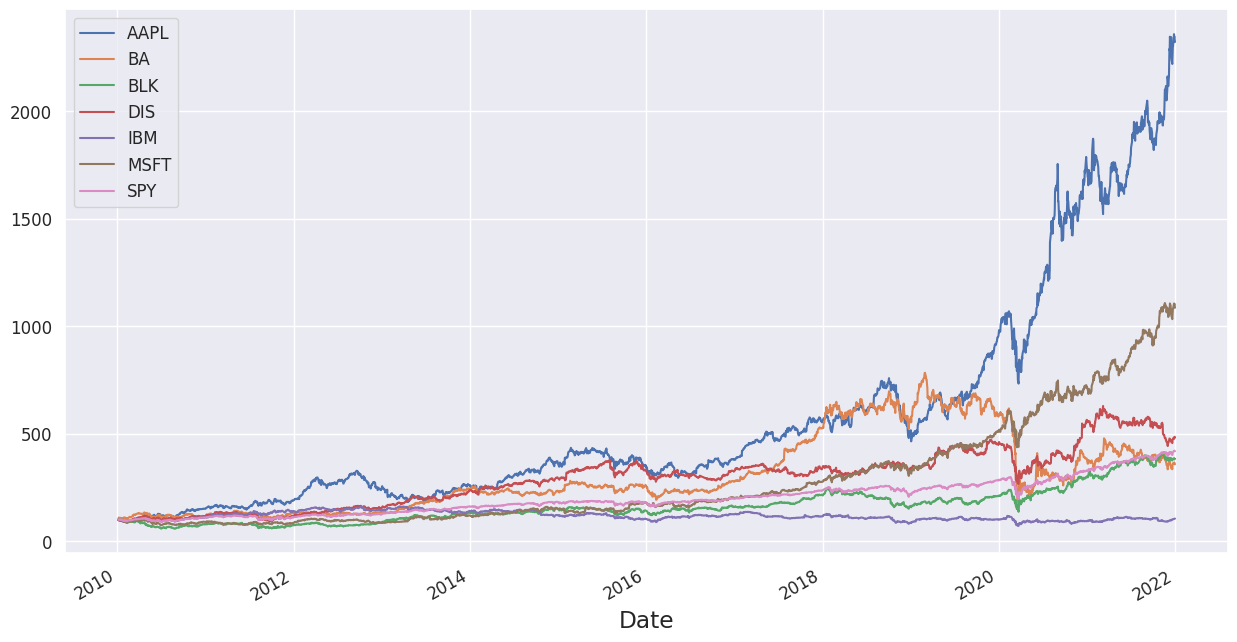

In [282]:

tickers = ["BLK","AAPL","BA","IBM","DIS","MSFT","SPY"]
Stocks = yf.download(tickers, start = "2010-01-01", end = "2022-01-01")
Stocks.head()

close=Stocks.loc[: ,"Close"].copy()
normclose = close.div(close.iloc[0]).mul(100)
norm_close=close.div(close.iloc[0]).mul(100)
norm_close.plot(figsize=(15,8), fontsize=12)
plt.legend(fontsize=12)
plt.show()


In [248]:
ret = close.pct_change().dropna()
ret.head()

,AAPL,BA,BLK,DIS,IBM,MSFT,SPY
Date,,,,,,,
2010-01-05,0.001729,0.032752,0.004317,-0.002495,-0.012080,0.000323,0.002647
2010-01-06,-0.015906,0.030334,-0.020617,-0.005314,-0.006496,-0.006137,0.000704
2010-01-07,-0.001849,0.040482,0.010994,0.000314,-0.003462,-0.010400,0.004221
2010-01-08,0.006648,-0.009646,0.007039,0.001571,0.010035,0.006897,0.003328
2010-01-11,-0.008821,-0.011851,0.016282,-0.016311,-0.010470,-0.012720,0.001397


In [249]:
ret.describe()

,AAPL,BA,BLK,DIS,IBM,MSFT,SPY
count,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000
mean,0.001199,0.000673,0.000597,0.000645,0.000119,0.000915,0.000532
std,0.017680,0.022382,0.017422,0.015713,0.014170,0.015801,0.010712
min,-0.128647,-0.238484,-0.136546,-0.129846,-0.128507,-0.147390,-0.109424
25%,-0.007132,-0.008766,-0.007717,-0.006371,-0.006315,-0.006748,-0.003507
50%,0.000947,0.000618,0.000720,0.000534,0.000293,0.000664,0.000669
75%,0.010473,0.009910,0.009394,0.007773,0.006913,0.008766,0.005462
max,0.119808,0.243186,0.135239,0.144123,0.113010,0.142169,0.090603


In [250]:
ret.describe().T

,count,mean,std,min,25%,50%,75%,max
AAPL,3020.0,0.001199,0.017680,-0.128647,-0.007132,0.000947,0.010473,0.119808
BA,3020.0,0.000673,0.022382,-0.238484,-0.008766,0.000618,0.009910,0.243186
BLK,3020.0,0.000597,0.017422,-0.136546,-0.007717,0.000720,0.009394,0.135239
DIS,3020.0,0.000645,0.015713,-0.129846,-0.006371,0.000534,0.007773,0.144123
IBM,3020.0,0.000119,0.014170,-0.128507,-0.006315,0.000293,0.006913,0.113010
MSFT,3020.0,0.000915,0.015801,-0.147390,-0.006748,0.000664,0.008766,0.142169
SPY,3020.0,0.000532,0.010712,-0.109424,-0.003507,0.000669,0.005462,0.090603


In [251]:
summary = ret.describe().T.loc[:,["mean","std"]]

In [252]:
summary 

,mean,std
AAPL,0.001199,0.017680
BA,0.000673,0.022382
BLK,0.000597,0.017422
DIS,0.000645,0.015713
IBM,0.000119,0.014170
MSFT,0.000915,0.015801
SPY,0.000532,0.010712


In [253]:
summary["mean"] = summary ["mean"] * 252
summary["std"] = summary ["std"] * np.sqrt(252)
summary 

,mean,std
AAPL,0.302034,0.280660
BA,0.169695,0.355306
BLK,0.150550,0.276572
DIS,0.162431,0.249430
IBM,0.029970,0.224950
MSFT,0.230604,0.250835
SPY,0.134119,0.170051


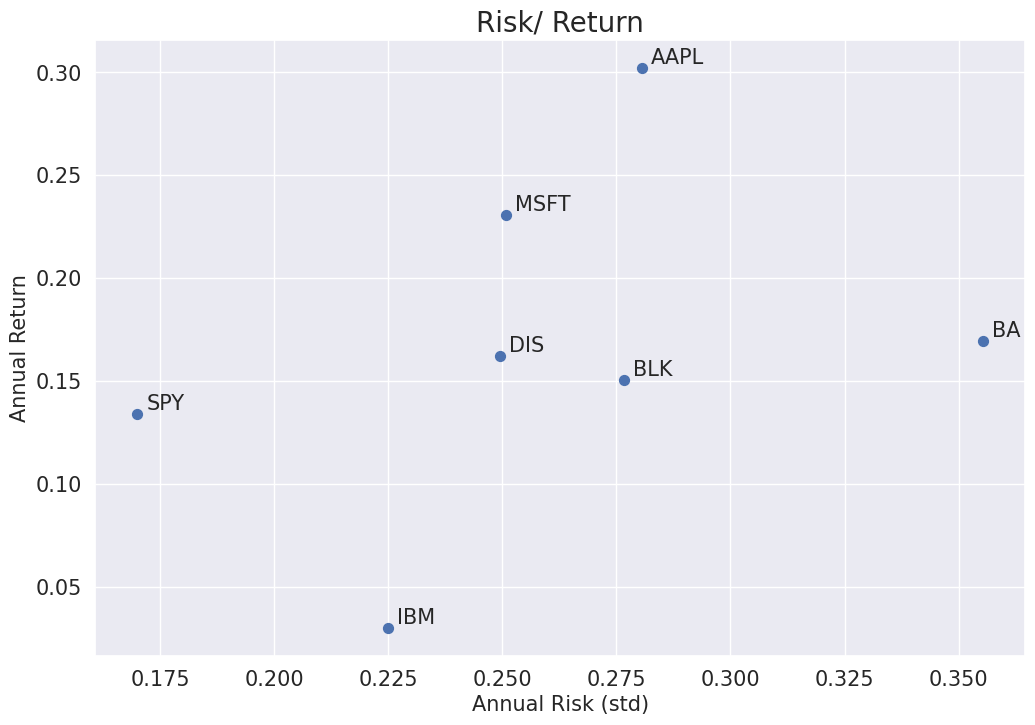

In [254]:
summary.plot.scatter(x = "std", y = "mean", figsize = (12, 8), s = 50, fontsize = 15) 
for i in summary.index:
  plt.annotate(i,xy=(summary.loc[i,"std"]+0.002,summary.loc[i,"mean"]+0.002),size=15)
plt.xlabel("Annual Risk (std)", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Risk/ Return", fontsize = 20)
plt.show()


In [255]:
## Correlation and covariance 
ret.cov()

,AAPL,BA,BLK,DIS,IBM,MSFT,SPY
AAPL,0.000313,0.000151,0.000142,0.000108,0.000102,0.000157,0.000125
BA,0.000151,0.000501,0.000197,0.000186,0.000152,0.000143,0.000155
BLK,0.000142,0.000197,0.000304,0.000153,0.000130,0.000154,0.000149
DIS,0.000108,0.000186,0.000153,0.000247,0.000105,0.000114,0.000116
IBM,0.000102,0.000152,0.000130,0.000105,0.000201,0.000111,0.000102
MSFT,0.000157,0.000143,0.000154,0.000114,0.000111,0.000250,0.000126
SPY,0.000125,0.000155,0.000149,0.000116,0.000102,0.000126,0.000115


In [256]:
ret.corr()

,AAPL,BA,BLK,DIS,IBM,MSFT,SPY
AAPL,1.000000,0.382803,0.460398,0.387788,0.406989,0.562020,0.660440
BA,0.382803,1.000000,0.505745,0.528273,0.479687,0.404361,0.647016
BLK,0.460398,0.505745,1.000000,0.558647,0.527379,0.557831,0.798716
DIS,0.387788,0.528273,0.558647,1.000000,0.470405,0.459075,0.690620
IBM,0.406989,0.479687,0.527379,0.470405,1.000000,0.495126,0.674425
MSFT,0.562020,0.404361,0.557831,0.459075,0.495126,1.000000,0.742908
SPY,0.660440,0.647016,0.798716,0.690620,0.674425,0.742908,1.000000


<Axes: >

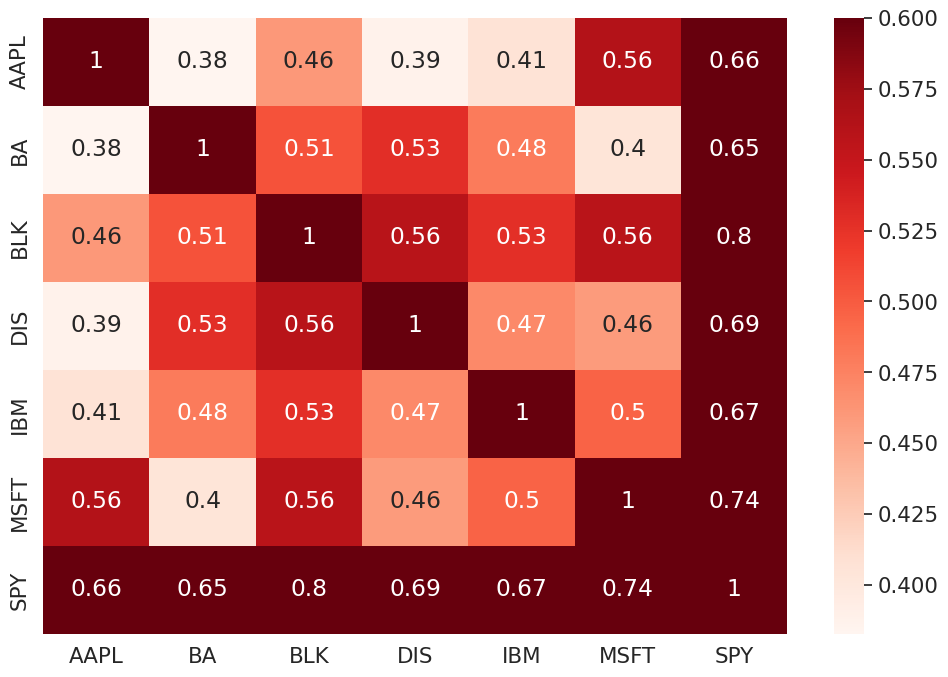

In [257]:
import seaborn as sns
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.4)
sns.heatmap(ret.corr(),cmap='Reds',annot=True,vmax=0.6,)

# Task 1 
Download 20 Stocks 

 

1.    Download 20 Stocks

2.   Calculate risk reward potential

1.   Compare covarience and corrolation 

2.   Consider best to invest in 





[*********************100%***********************]  7 of 7 completed


Adj Close                                                 \
                 AAPL          BA         BLK        DIS         IBM   
Date                                                                   
2015-01-02  24.531759  113.657227  289.459686  87.376274  106.693764   
2015-01-05  23.840664  112.870049  281.970215  86.099411  105.014992   
2015-01-06  23.842916  111.540619  277.588470  85.642715  102.750229   
2015-01-07  24.177244  113.272392  283.463226  86.518814  102.078667   
2015-01-08  25.106192  115.275269  286.773773  87.413536  104.297379   

                                       Close                          ...  \
                 MSFT         SPY       AAPL          BA         BLK  ...   
Date                                                                  ...   
2015-01-02  40.620667  176.788834  27.332500  129.949997  356.730011  ...   
2015-01-05  40.247120  173.596146  26.562500  129.050003  347.500000  ...   
2015-01-06  39.656399  171.961060  26.565001  127.529999  342.100006  ...   
2015-01-07  40.160252  174.103912  26.937500  129.509995  349.339996  ...   
2015-01-08  41.341690  177.193344  27.972500  131.800003  353.420013  ...   

                  Open                            Volume                   \
                   IBM       MSFT         SPY       AAPL       BA     BLK   
Date                                                                        
2015-01-02  154.216064  46.660000  206.380005  212818400  4294200  367000   
2015-01-05  154.177826  46.369999  204.169998  257142000  5024800  465900   
2015-01-06  152.648178  46.380001  202.089996  263188400  4992800  626400   
2015-01-07  150.286804  45.980000  201.419998  160423600  3573200  388300   
2015-01-08  149.369019  46.750000  204.009995  237458000  4503400  480600   

                                                   
                DIS      IBM      MSFT        SPY  
Date                                               
2015-01-02  5865400  5779673  27913900  121465900  
2015-01-05  7789400  5104898  39673900  169632600  
2015-01-06  6793100  6429448  36447900  209151400  
2015-01-07  6589500  4918083  29114100  125346700  
2015-01-08  7579400  4431693  29645200  147217800  

[5 rows x 42 columns]